## Рынок заведений общественного питания Москвы

### Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

### Описание данных
### Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

### Часть 1. Загрузка и предподготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# установим стиль графиков
plt.style.use('ggplot')

In [2]:
# читаем данные и записываем в переменную
food = pd.read_csv('/datasets/rest_data.csv')

In [3]:
# первичная проверка
food.info()
food.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
# проверим на дубликаты
food.duplicated(subset=['object_name', 'chain', 'object_type', 'address']).value_counts()

False    15196
True       170
dtype: int64

Обнаружены пропуски данных, избавимся от них.

In [5]:
# удаляем дубликаты
food = food.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address'])
# проверяем
food.duplicated(subset=['object_name', 'chain', 'object_type', 'address']).value_counts()

False    15196
dtype: int64

### Часть 2. Анализ данных

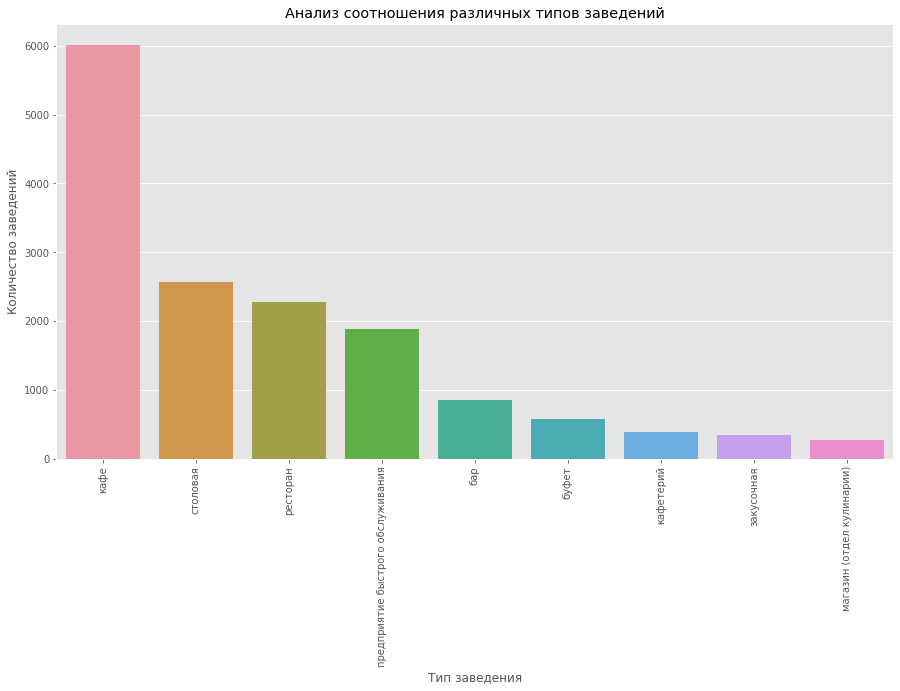

In [6]:
# оценим соотношение типов заведений
object_types = food.groupby('object_type')['id'].count().reset_index().sort_values(by='id', ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=object_types, x='object_type', y='id')
plt.title('Анализ соотношения различных типов заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
plt.show()

#### Вывод по анализу соотношения типов заведений:
- Со значительным преимуществом по количеству заведений опережает кафе. Дело в том, что кафе - крайне неоднозначное понятие, и уровень обслуживания может быть и как в ресторане, и как в столовой.

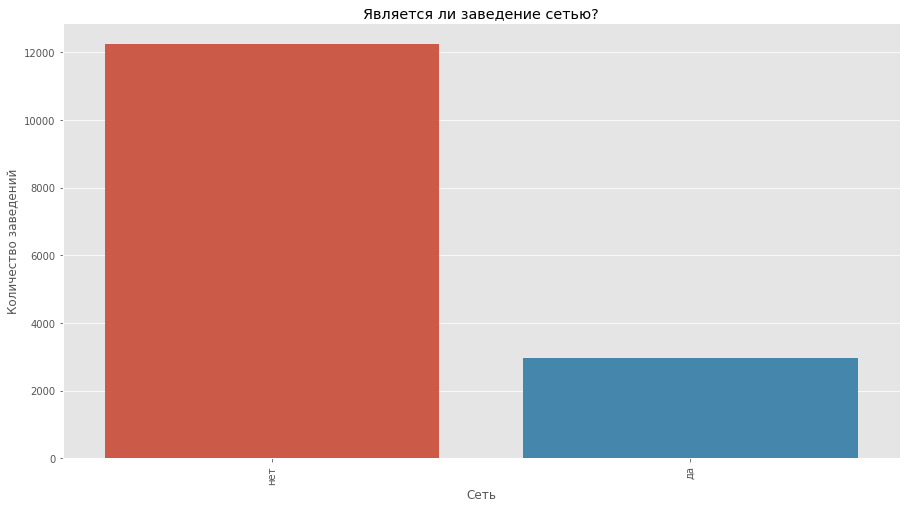

In [7]:
# оценим соотношение сетевых и несетевых заведений
chain_types = food.groupby('chain')['id'].count().reset_index().sort_values(by='id', ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=chain_types, x='chain', y='id')
plt.title('Является ли заведение сетью?')
plt.xlabel('Сеть')
plt.ylabel('Количество заведений')
plt.show()

#### Вывод по анализу причастности заведений к сети:
- Большинство заведений общественного питания - несетевые.

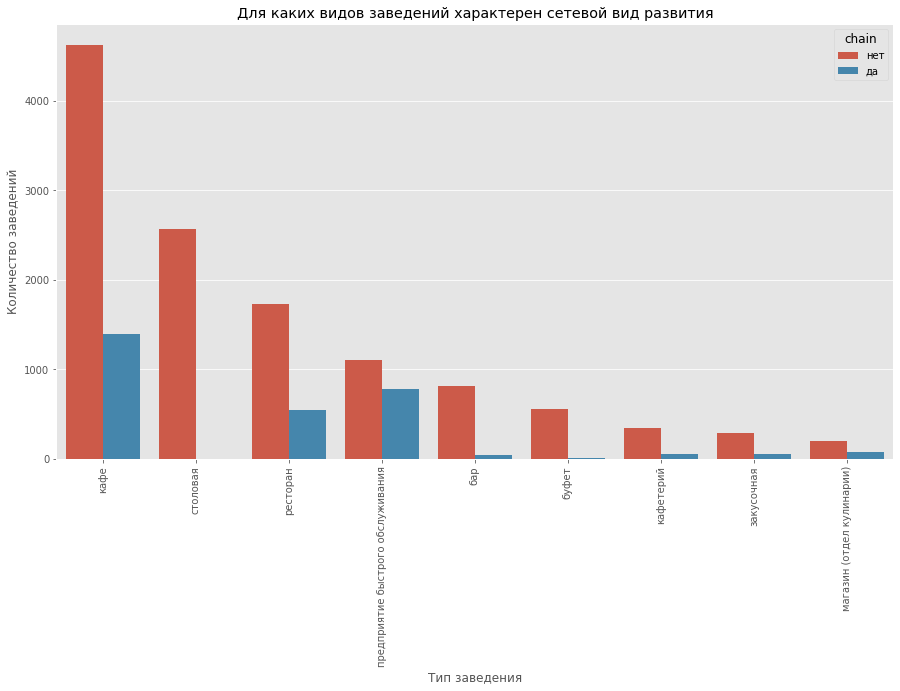

In [8]:
# оценим, для каких видов заведений характерен сетевой вид развития
object_types_chain = food.groupby(['object_type','chain'])['id'].count().reset_index().sort_values(by='id', ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=object_types_chain, x='object_type', y='id', hue='chain')
plt.title('Для каких видов заведений характерен сетевой вид развития')
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
plt.show()

In [9]:
# для большей наглядности оформим данные в таблицу
object_types_chain_all = object_types_chain.groupby('object_type')['id'].sum().reset_index()
object_types_chain_part = object_types_chain.merge(object_types_chain_all, on='object_type', how='left')
object_types_chain_part['%chain'] = round(object_types_chain_part['id_x'] / object_types_chain_part['id_y'] * 100,2)
object_types_chain_part[object_types_chain_part['chain'] == 'да'][['object_type', '%chain']].sort_values('%chain', ascending=False)

,object_type,%chain
6,предприятие быстрого обслуживания,41.46
12,магазин (отдел кулинарии),28.68
8,ресторан,23.81
3,кафе,23.08
13,закусочная,16.09
14,кафетерий,12.98
15,бар,4.34
16,буфет,1.93
17,столовая,0.12


#### Вывод по анализу наиболее подходящих для создания сетей форматов заведений:
- Очевидно, что сетевой вид развития больше всего характерен для фаст-фуд заведений. Фаст-фуд - это всегда поточно организованное производство, которое легко масштабировать;
- Также сетевой вид развития характерен для отдел кулинарии продуктовых магазинов, которые также легко масштабируются;
- Тройку замыкают кафе, где примерно 1 из 4 заведений относится к какой-либо сети.

In [10]:
# оценим, что характерно для сетевых заведений
pivot = food[food['chain']=='да'].groupby('object_name').agg({'id':'count', 'number':'sum'})\
.sort_values(by='id', ascending=False)
pivot.columns = ['number_of_places', 'number_of_chairs']
pivot['avg_chairs'] = round(pivot['number_of_chairs'] / pivot['number_of_places'],0)
print('В среднем в каждой сети',
      int(pivot[pivot['number_of_places'] > 1]['number_of_places'].mean()),
      'заведения с',
      int(pivot[pivot['number_of_places'] > 1]['avg_chairs'].mean()),
      'посадочных мест')

В среднем в каждой сети 9 заведения с 57 посадочных мест


#### Вывод по характеристике сетевых заведений:
- В среднем каждая сеть ресторанов насчитывает 9 заведений с 57 посадочных мест

In [11]:
# оценим, что характерно для несетевых заведений
pivot = food[food['chain']=='нет'].groupby('object_name').agg({'id':'count', 'number':'sum'})\
.sort_values(by='id', ascending=False)
pivot.columns = ['number_of_places', 'number_of_chairs']
pivot['avg_chairs'] = round(pivot['number_of_chairs'] / pivot['number_of_places'],0)
print('В среднем в каждом несетевом заведении',
      int(pivot['avg_chairs'].mean()),
      'посадочных мест')

В среднем в каждом несетевом заведении 65 посадочных мест


#### Вывод по характеристике несетевых заведений:
- Было интересно проверить расчеты, а также проверить, характерно ли для несетевых заведений большее количество посадочных мест. Ответ - да, согласно данным, в среднем в несетевых заведениях на 5 посадочных мест больше, чем в сетевых.

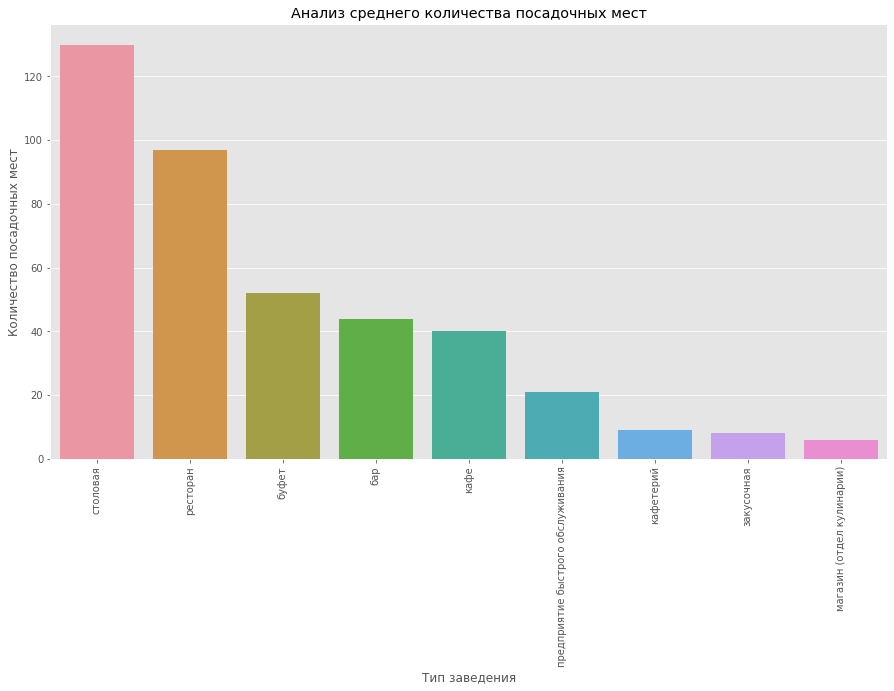

In [12]:
# проверим, в каких видах заведений больше всего посадочных мест
pivot = food.groupby('object_type').agg({'id':'count', 'number':'sum'})\
.reset_index()
pivot.columns = ['object_type','number_of_places', 'number_of_chairs']
pivot['avg_chairs'] = round(pivot['number_of_chairs'] / pivot['number_of_places'],0)
pivot = pivot.sort_values(by='avg_chairs',ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=pivot, x='object_type', y='avg_chairs')
plt.title('Анализ среднего количества посадочных мест')
plt.xlabel('Тип заведения')
plt.ylabel('Количество посадочных мест')
plt.show()

#### Вывод по анализу среднего количества посадочных мест для всех форматов заведений:
- Ожидаемые результаты - столовые в среднем имеют наибольшее количество посадочных мест, за ними следуют рестораны;
- Наименьшее количество посадочных мест - опять ожидаемо, имеет отдел кулинарии в магазинах. Зачастую в этих отделах вообще нет возможности сесть.

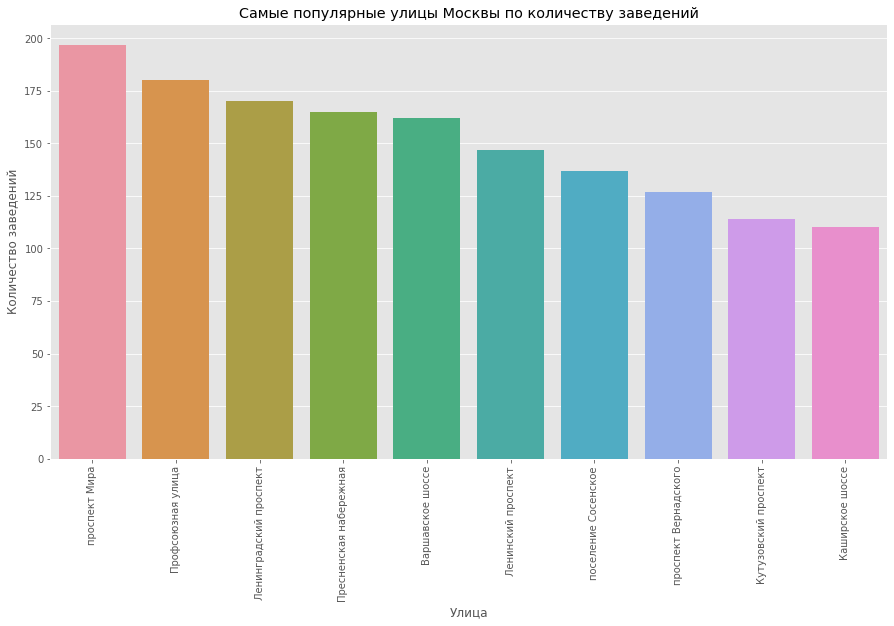

,area,count
118,Тверской район,1109
23,Пресненский район,764
4,Басманный район,692
9,Даниловский район,667
15,Мещанский район,649
11,Донской район,573
117,Таганский район,494
20,Обручевский район,490
41,Район Замоскворечье,476
38,Район Гагаринский,468


,okrug,count
6,ЦАО,5713
7,ЮАО,4386
9,ЮЗАО,4006
3,САО,3417
4,СВАО,3199
1,ЗАО,2532
0,ВАО,2129
8,ЮВАО,1834
5,СЗАО,999
2,Зеленоград,428


In [13]:
# выделим названия улиц в отдельный столбец
food['address_split']=food['address'].str.split(",")
text = 'город'
def splitter_street(row):
    if ('город' or 'поселение') in row['address_split'][1]:
        return row['address_split'][2]
    else: return row['address_split'][1]
food['street']=food.apply(splitter_street, axis=1)

# удалим лишние символы
def deleter(text):
    return text.strip(' ')
food['street']=food['street'].apply(deleter)

# определим список наиболее популярных для открытия заведений улиц и визуализируем
rating = food.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False)
rating.columns = ['street', 'count']
cut = rating.head(10)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=cut, x='street', y='count')
plt.title('Самые популярные улицы Москвы по количеству заведений')
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.show()

# прочитаем файл с привязанными к улицам районам и округам
mapping=pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')

# объединим датафреймы
popular_area = rating.merge(mapping, left_on='street', right_on='streetname')
display(popular_area.groupby('area')['count'].sum().reset_index().sort_values(by='count', ascending=False).head(10))
display(popular_area.groupby('okrug')['count'].sum().reset_index().sort_values(by='count', ascending=False).head(10))

#### Получены следующие выводы:
- Наибольшее количество заведений, очевидно, оказалось в самых длинных улицах Москвы. 

#### При укруплении до районов получены следующие выводы:
- Тверской район с большим открывом является наиболее загруженным с точки зрения количества заведений;
- Пресненский, Басманный, Даниловский и Мещанский районе также можно назвать загруженными

#### Также было интересно укрупнить данные до округов и посмотреть результаты:
- Центальный округ, очевидно, оказался наиболее заполненным заведениями;
- Южный и юго-западные округа расположились на 2 и 3 месте соответственно;
- 4 и 5 место заняли Северный и Северо-Восточные округа.

In [14]:
cut.merge(mapping, left_on='street', right_on='streetname')\
.groupby('area')['areaid'].count().reset_index().sort_values('areaid', ascending=False)

,area,areaid
2,Донской район,2
3,Ломоносовский район,2
19,Район Проспект Вернадского,2
6,Обручевский район,2
25,Район Теплый Стан,2
16,Район Нагатино-Садовники,2
26,Район Тропарево-Никулино,2
11,Район Гагаринский,2
0,Академический район,1
28,Район Черемушки,1


#### Вывод по расположению топ-10 улиц:
- В целом топ-10 улиц распределены равномерно, выделяются всего 8 районов, куда попало больше 1 улицы

In [15]:
# определим наименее заполненные заведениями питания улицы и округа
unpopular = rating[rating['count'] == 1]

unpopular_area = unpopular.merge(mapping, left_on='street', right_on='streetname')
display(unpopular_area.groupby('area')['count'].sum().reset_index().sort_values(by='count', ascending=False).head(10))
display(unpopular_area.groupby('okrug')['count'].sum().reset_index().sort_values(by='count', ascending=False).head(10))

,area,count
95,Таганский район,27
81,Район Хамовники,26
3,Басманный район,25
96,Тверской район,20
21,Пресненский район,19
51,Район Марьина роща,18
22,Район Арбат,17
13,Мещанский район,16
75,Район Сокольники,15
34,Район Замоскворечье,14


,okrug,count
6,ЦАО,185
0,ВАО,70
4,СВАО,66
3,САО,55
8,ЮВАО,55
1,ЗАО,43
7,ЮАО,30
9,ЮЗАО,27
5,СЗАО,26
2,Зеленоград,5


#### При анализе наименее заполненных районов и округов получены интересные выводы:
- Наименее загруженные районы чаще всего относятся к Центральному округу Москвы, из-за чего он может показаться незагруженным, но по прошлому анализу мы получили противоположные выводы;
- Проанализировав текущие и прошлые выводы, можно сказать, что Северо-Западный и Зеленогдарские администативные округа являются наименее загруженными

                                 Анализ распределения количества мест на проспект Мира


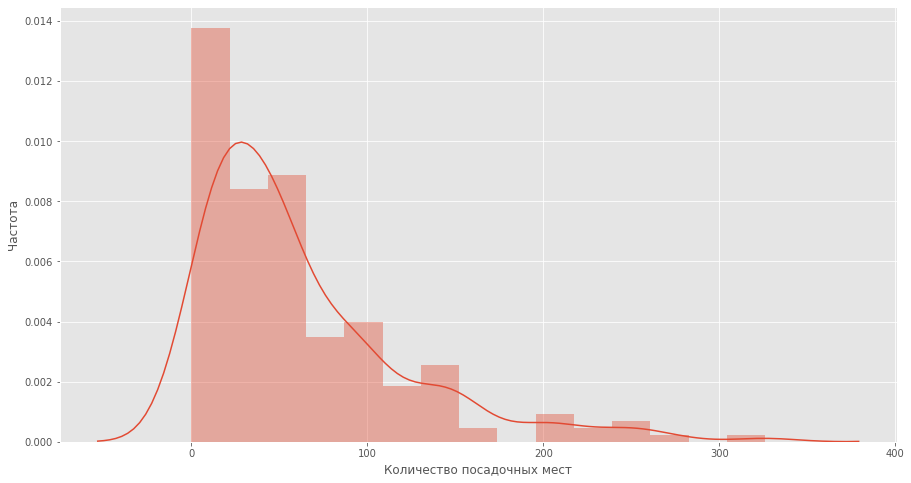

                                 Анализ распределения количества мест на Профсоюзная улица


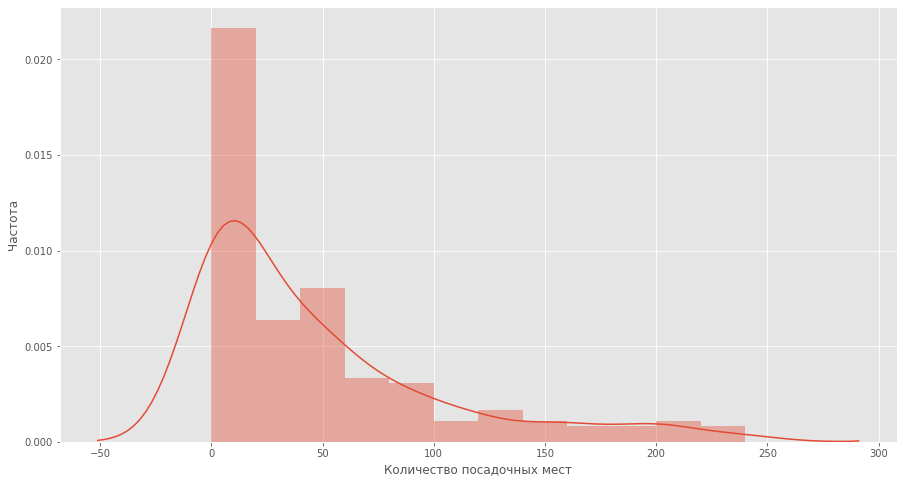

                                 Анализ распределения количества мест на Ленинградский проспект


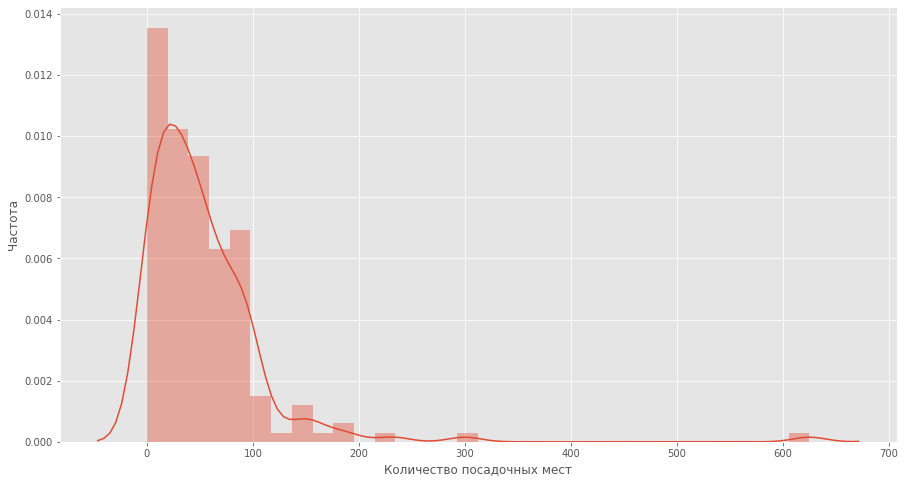

                                 Анализ распределения количества мест на Пресненская набережная


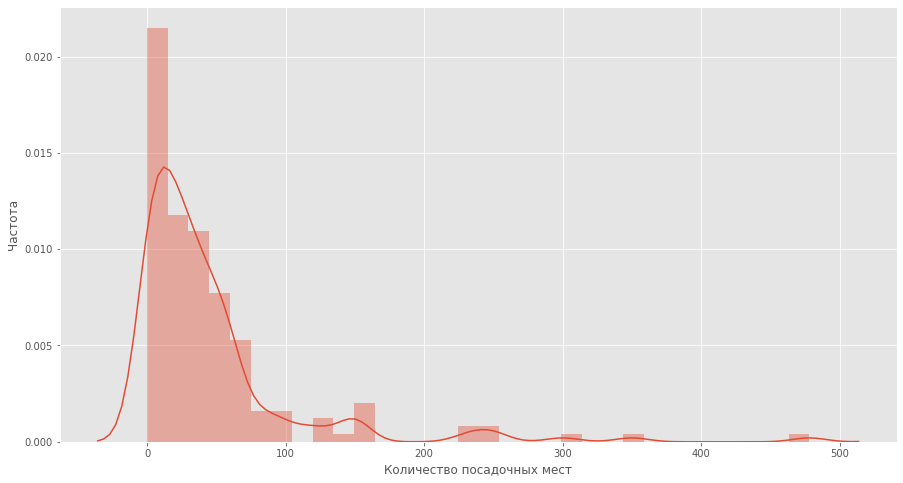

                                 Анализ распределения количества мест на Варшавское шоссе


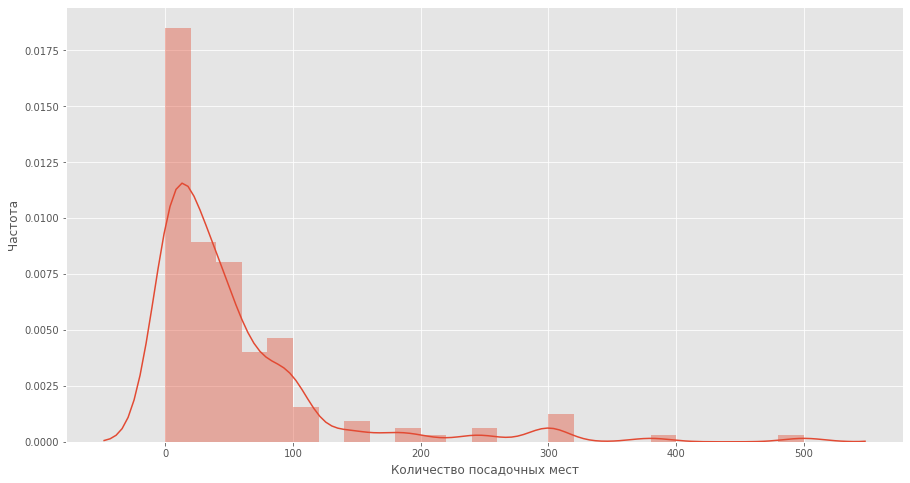

                                 Анализ распределения количества мест на Ленинский проспект


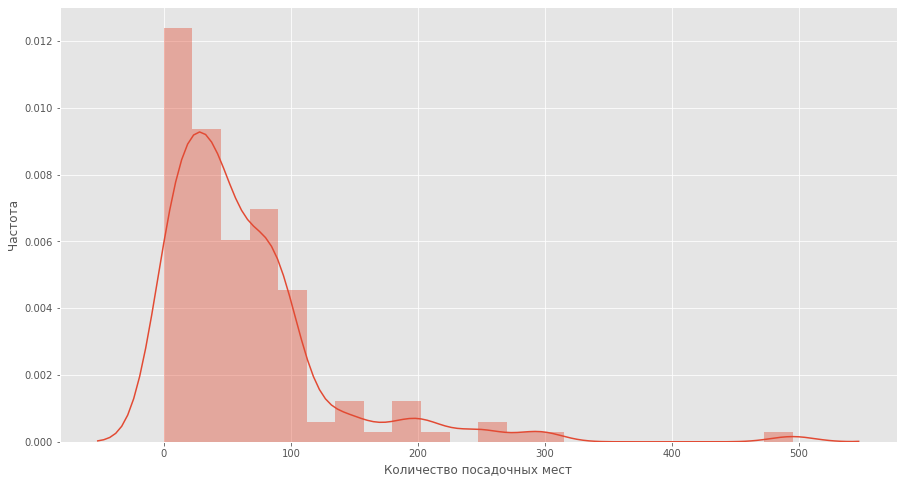

                                 Анализ распределения количества мест на поселение Сосенское


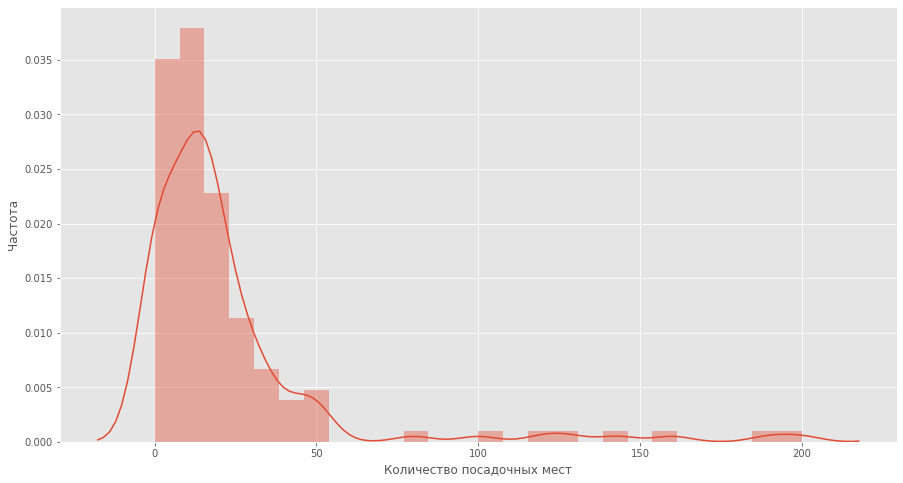

                                 Анализ распределения количества мест на проспект Вернадского


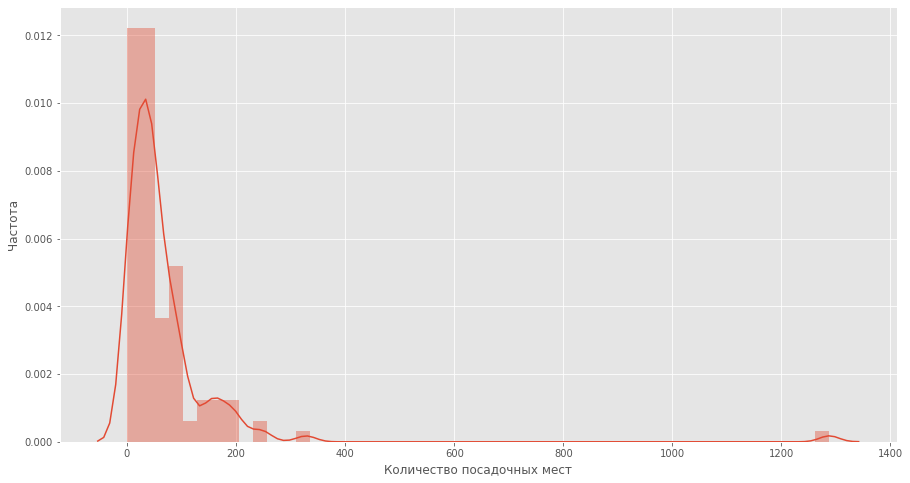

                                 Анализ распределения количества мест на Кутузовский проспект


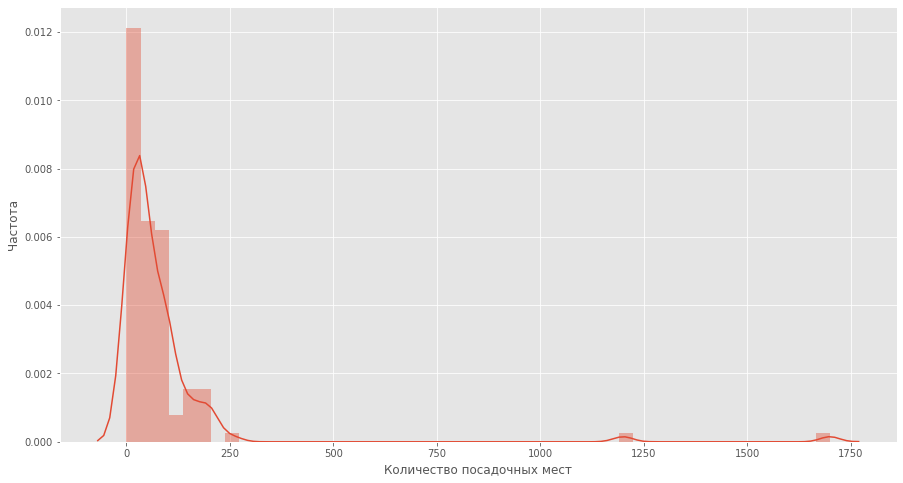

                                 Анализ распределения количества мест на Каширское шоссе


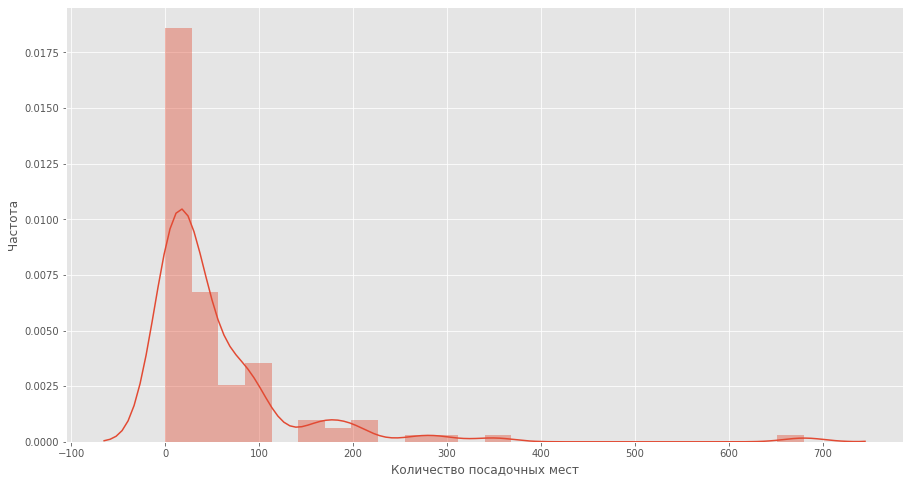

In [16]:
# оценим распределение посадочных мест для наиболее популярных улиц
for street in cut['street']:
    
    data = food[food['street'] == street]
    plt.figure(figsize=(15,8))
    sns.distplot(data['number'])
    print('                                 Анализ распределения количества мест на', street)
    plt.xlabel('Количество посадочных мест')
    plt.ylabel('Частота')
    plt.show()

#### Вывод по анализу распределения количества посадочных мест для топ-10 улиц:
- Для всех проанализированных популярных улиц распределение количества мест имеет пуассоновский вид - чаще всего встречаются заведения, в которых менее 20 посадочных мест. Очевидный вывод, ведь количество заведений обратнопропорционально среднему количеству посадочных мест, иначе бы для всех заведений не нашлось бы клиента.

### Общий вывод по исследованию:

Я бы порекомендовал не открывать заведение, где посетителей будут обслуживать роботы в любом формате, кроме фаст-фуда, по следующим причинам:
- Кафе или столовая малопригодны для такого формата, так как гости скорее всего не будут видеть в обслуживании роботами дополнительной ценности;
- Рестораны можно назвать форматом, в котором этот концепт может прижиться, однако и тут есть свои ньюансы: ресторанные блюда зачастую довольно сложные, и их сложно будет перевести в машинный формат. Плюс для ресторана необходимо большое количество посадочных мест, так как необходимо окупать затраты на конструирование сложных роботов;
- Для большого количества посадочных мест необходима большая площадь, с которой проблемы в популярных для расмещения заведений питания улицах.

Исходя из анализа рынка, для потенциального инвестора я бы предложил открывать сеть ресторанов быстрого питания по следующим причинам:
- Исходя из текущих данных, фаст-фуд является лучшим вариантом для открытия целой сети ресторанов, так как данный формат легко поддается масштабированию, и для его функционирования подходит низкоуровневый труд, который легче поддается замене на машинный труд. Плюсом к этому будет легче поддерживать стандарты приготовления блюд, так как человеческий фактор исключится;
- Чем более распространной будет сеть, тем дешевле будет обходиться производство машин, и тем выгодней окажется замена человеческого труда на машинный;
- Исходя из текущих данных, в среднем фаст-фуду необходимо 20 посадочных мест, что также хорошо накладывается на факт того, что для самых популярных улиц характерны заведения с количеством посадочных мест до 20, то есть формат заведения не будет привязан к конкретному георгафическому району Москвы.

Презентация с графиками и выводами представлена ниже.

### Часть 3. Подготовка презентации

Презентация: https://yadi.sk/i/Iw5ms_GPuuEajg